In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Path to SledgeHAMR top directory
sys.path.append('../../')
import pySledgehamr as sh

### Create Initial State

In [39]:
strings = sh.AxionStrings()
#strings.CreateInitialState(L=23, N=128, k_max=5, t_start=0.1, output_file='initial_state.hdf5') 

### Read Output

In [40]:
out = sh.Output('output')

print()

times = out.GetTimesOfSlices()
print('Slices written at t =\t\t', times)

times = out.GetTimesOfCoarseBoxes()
print('Coarse boxes written at t =\t', times)

times = out.GetTimesOfFullBoxes()
print('Full boxes written at t =\t', times)

times = out.GetTimesOfSlicesTruncationError()
print('Slices of truncation errors written at t =', times)

Number of slices found: 6
Number of coarse boxes found: 6
Number of full boxes found: 6
Number of slices of truncation errors found: 6

Slices written at t =		 [0.13515625 0.6625     1.18984375 1.7171875  2.24453125 2.52578125]
Coarse boxes written at t =	 [0.13515625 0.6625     1.18984375 1.7171875  2.24453125 2.52578125]
Full boxes written at t =	 [0.13515625 0.6625     1.18984375 1.7171875  2.24453125 2.52578125]
Slices of truncation errors written at t = [0.13515625 0.6625     1.18984375 1.7171875  2.24453125 2.52578125]


## Plot Slice

output/slices/4/Level_1 256 x 8 Psi1 1
output/slices/4/Level_1 256 x 8 Psi2 1
t=2.24453125


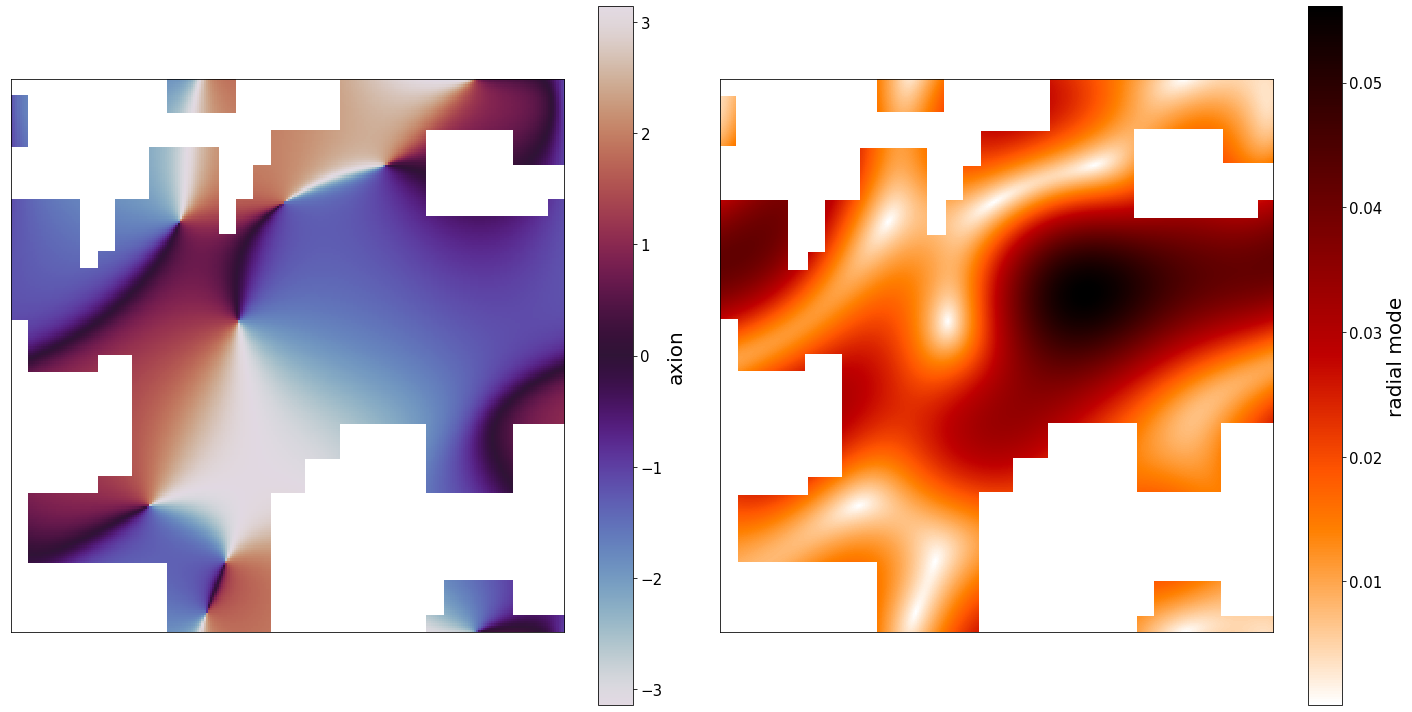

In [41]:
# id of slice to be plotted
i = 4
lev = 1

# Read a slice along the x-axis.
slices = out.GetSlice(i, 'x', lev, ['Psi1', 'Psi2'])
t = slices['t']
print('t='+str(t))

axion = np.arctan2(slices['Psi2'], slices['Psi1'])
radial_mode = np.sqrt(slices['Psi1']**2 + slices['Psi2']**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

## Load coarse box and plot a slice.

t=2.24453125


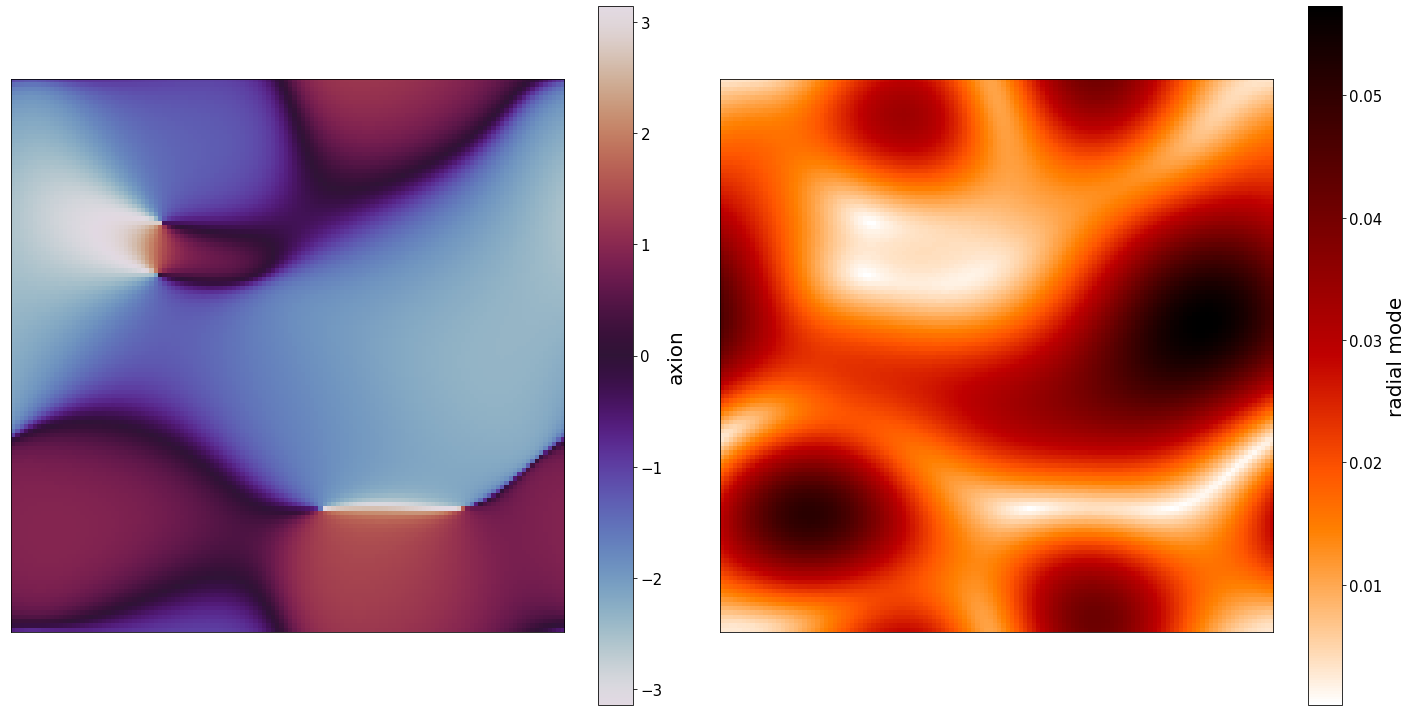

In [42]:
# Id of coarse box to be plotted
i = 4

# Read coarse box and grab a slice.
coarse_box = out.GetCoarseBox(i, ['Psi1', 'Psi2'])
t = coarse_box['t']
print('t='+str(t))

axion = np.arctan2(coarse_box['Psi2'][:,:,0], coarse_box['Psi1'][:,:,0])
radial_mode = np.sqrt(coarse_box['Psi1'][:,:,0]**2 + coarse_box['Psi2'][:,:,0]**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

## Load a full box (at a finer level) and plot a slice.

t=1.7171875


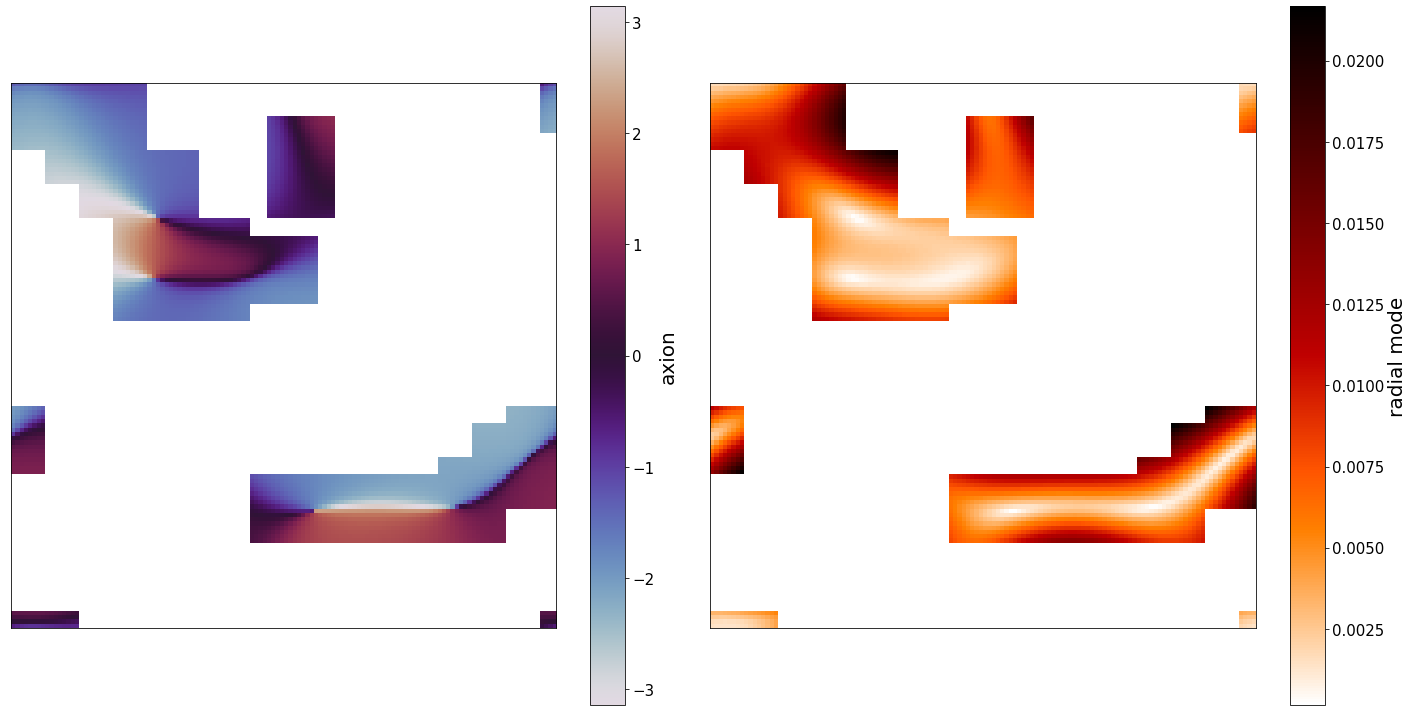

In [43]:
# Id of coarse box to be plotted
i = 3
level = 1

# Read coarse box and grab a slice. This output has been downsampled (see output.full_box_downsample_factor = 2)
full_box = out.GetFullBox(i, level, ['Psi1', 'Psi2'])
t = full_box['t']
print('t='+str(t))

axion = np.arctan2(full_box['Psi2'][:,:,0], full_box['Psi1'][:,:,0])
radial_mode = np.sqrt(full_box['Psi1'][:,:,0]**2 + full_box['Psi2'][:,:,0]**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

## Plot slice of truncation errors

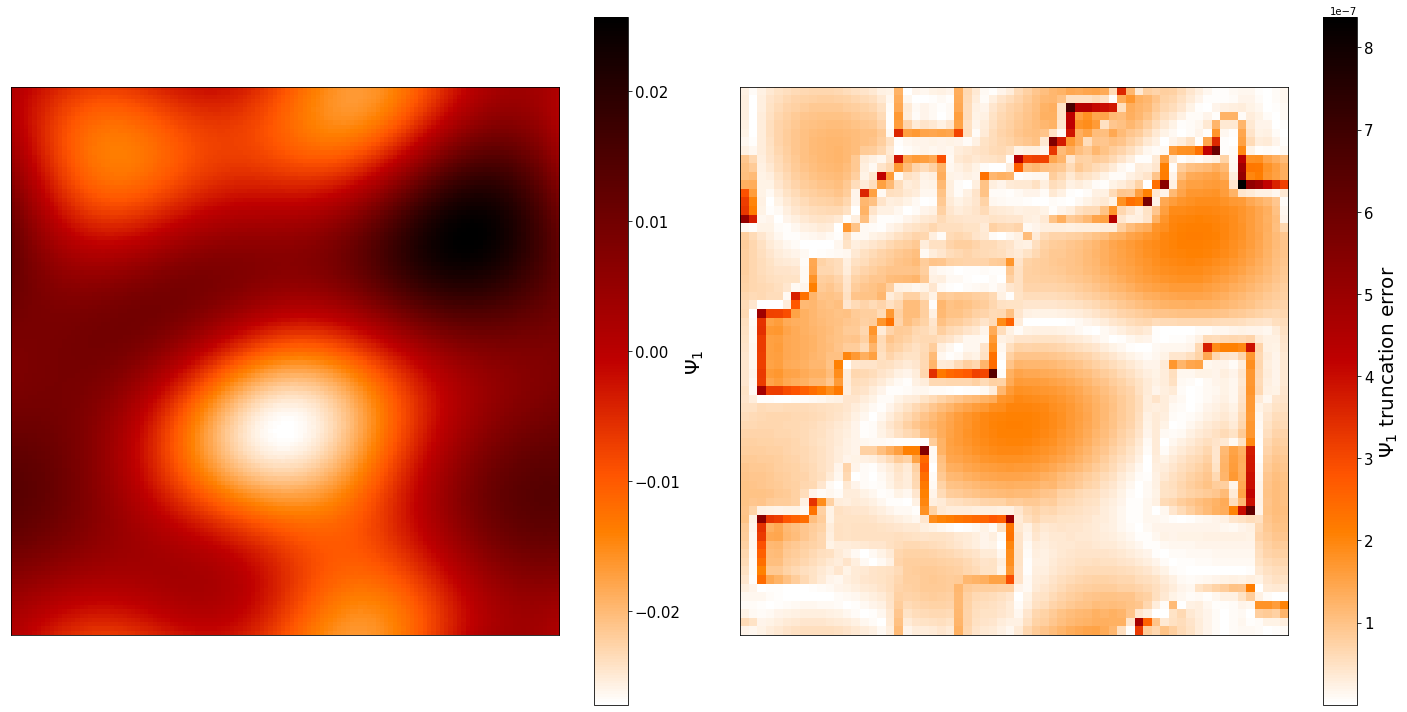

In [67]:
# Id of slice to be plotted.
i = 1
lev = 0

# Read a slice along the x-axis.
slices = out.GetSliceTruncationError(i, 'x', lev, ['Psi1'])
t = slices['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

im = ax[0].imshow(slices['Psi1'], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(slices['Psi1_truncation_error'], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$ truncation error',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()